


> Grace Esther



### **Dataset 3B: Restaurant Recommendation**

This dataset provides detailed information about restaurants listed on Zomato, including their offerings, ratings, and other attributes. Below are the column descriptions:

1. **url**: The restaurant’s Zomato URL.
2. **name**: The name of the restaurant.
3. **online_order**: Indicates whether the restaurant accepts online orders (Yes/No).
4. **book_table**: Indicates whether customers can book tables at the restaurant (Yes/No).
5. **rate**: The overall rating of the restaurant on Zomato (range: 0-5).
6. **votes**: The number of people who have rated the restaurant.
7. **location**: The location of the restaurant.
8. **rest_type**: The type of the restaurant (e.g., quick bites, casual dining, etc.).
9. **cuisines**: Types of cuisines served at the restaurant.
10. **approx_cost (for two people)**: The approximate cost for a meal for two people (in Rupees).
11. **listed_in (type)**: The category of the restaurant (e.g., delivery, dine-out, etc.).
12. **sell_beverages**: Indicates whether the restaurant sells beverages.
13. **sell_chinese_food**: Indicates whether the restaurant offers Chinese food.
14. **sell_thai_food**: Indicates whether the restaurant offers Thai food.
15. **sell_indian_food**: Indicates whether the restaurant offers Indian food.
16. **sell_mediterranean_food**: Indicates whether the restaurant offers Mediterranean food.
17. **sell_fast_food**: Indicates whether the restaurant offers fast food.
18. **sell_desserts**: Indicates whether the restaurant offers desserts.


---

Instructed to make a restaurant recommender system.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
df = pd.read_csv('3B.tsv', delimiter = '\t')
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes


# A

Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key findings and anomalies existing in the dataset.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15000 non-null  object
 1   name                         15000 non-null  object
 2   online_order                 15000 non-null  object
 3   book_table                   15000 non-null  object
 4   rate                         12736 non-null  object
 5   votes                        15000 non-null  int64 
 6   location                     14992 non-null  object
 7   rest_type                    14931 non-null  object
 8   cuisines                     14988 non-null  object
 9   approx_cost(for two people)  14908 non-null  object
 10  listed_in(type)              15000 non-null  object
 11  sell_beverages               14988 non-null  object
 12  sell_chinese_food            14988 non-null  object
 13  sell_thai_food               14

In [101]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

In [102]:
df.describe()

,rate,votes,approx_cost(for two people)
count,12074.000000,15000.000000,12937.000000
mean,3.698766,285.355000,417.061065
std,0.445677,812.512684,192.757490
min,1.800000,-1.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,39.000000,400.000000
75%,4.000000,197.000000,550.000000
max,4.900000,16832.000000,950.000000


In [103]:
df.isna().sum()

,0
url,0
name,0
online_order,0
book_table,0
rate,2926
votes,0
location,8
rest_type,69
cuisines,12
approx_cost(for two people),2063


In [104]:
mean_rate = df['rate'].mean()
df['rate'] = df['rate'].fillna(mean_rate)
mean_cost = df['approx_cost(for two people)'].mean()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(mean_cost)

In [105]:
df.isna().sum()

,0
url,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,8
rest_type,69
cuisines,12
approx_cost(for two people),0


In [106]:
df = df.dropna(subset=['rest_type', 'location', 'cuisines', 'sell_beverages',
                       'sell_chinese_food', 'sell_thai_food', 'sell_indian_food',
                       'sell_mediterranean_food', 'sell_fast_food', 'sell_desserts'])

In [107]:
n_cust = len(df['name'].unique())
n_cuisine = len(df['cuisines'].unique())
n_rest = len(df['rest_type'].unique())
n_loc = len(df['location'].unique())
print("Number of unique customers:", n_cust)
print("Number of unique cuisines:", n_cuisine)
print("Number of unique restaurants:", n_rest)
print("Number of unique locations:", n_loc)
print('--------')
print('The full rating matrix will have:', n_cust * n_rest, 'elements')
print('The sparse rating matrix will have:', n_cust * n_cuisine, 'elements')

Number of unique customers: 6091
Number of unique cuisines: 2109
Number of unique restaurants: 85
Number of unique locations: 91
--------
The full rating matrix will have: 517735 elements
The sparse rating matrix will have: 12845919 elements


In [108]:
df = df.drop(columns=['online_order', 'book_table', 'votes'])

In [109]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == "object":
        categorical.append(i)
    else:
        numerical.append(i)

print('numerical: ',numerical)
print('categorical: ',categorical)

numerical:  ['rate', 'approx_cost(for two people)']
categorical:  ['url', 'name', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'sell_beverages', 'sell_chinese_food', 'sell_thai_food', 'sell_indian_food', 'sell_mediterranean_food', 'sell_fast_food', 'sell_desserts']


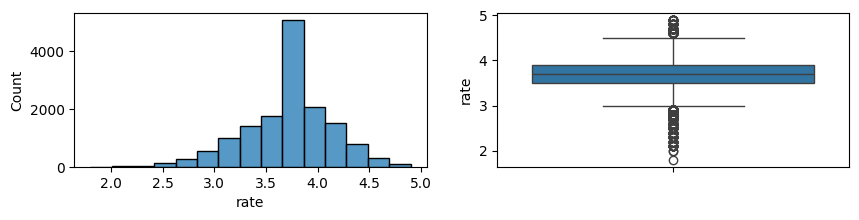

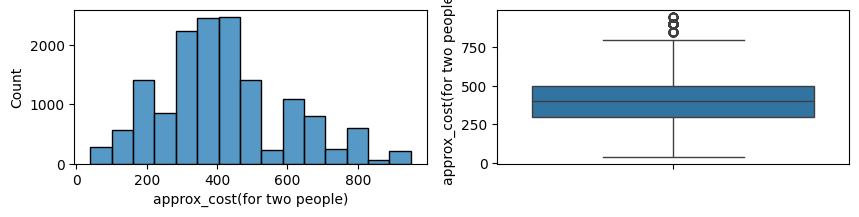

In [110]:
def check_num_dist(df, column):
    for i in column:
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.histplot(df[i], bins=15)

        plt.subplot(1,2,2)
        sns.boxplot(y=df[i])
        plt.show()

check_num_dist(df[numerical], numerical)

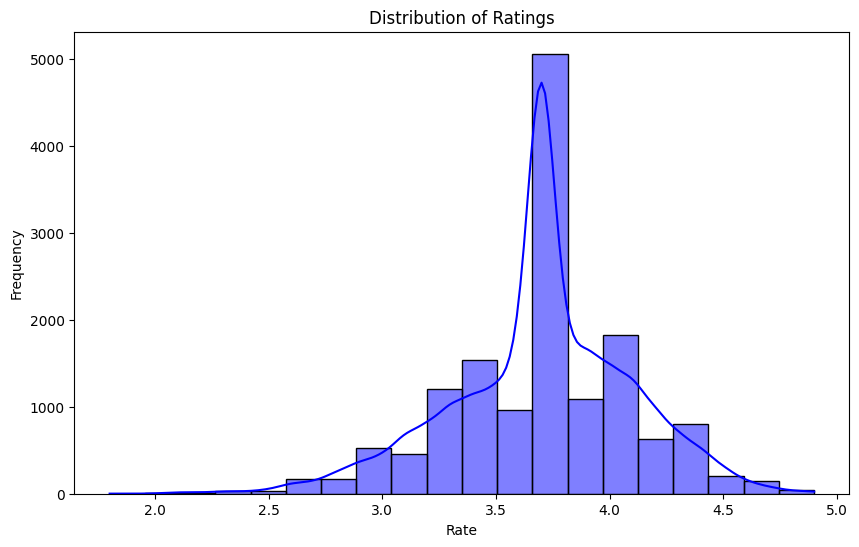

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

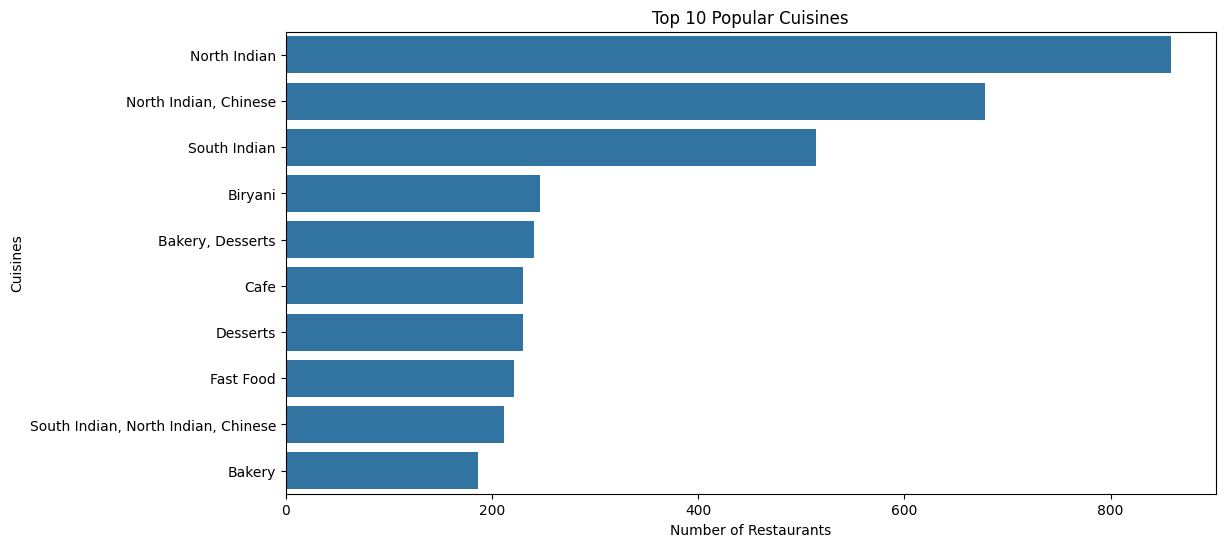

In [112]:
plt.figure(figsize=(12, 6))
cuisine_counts = df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()

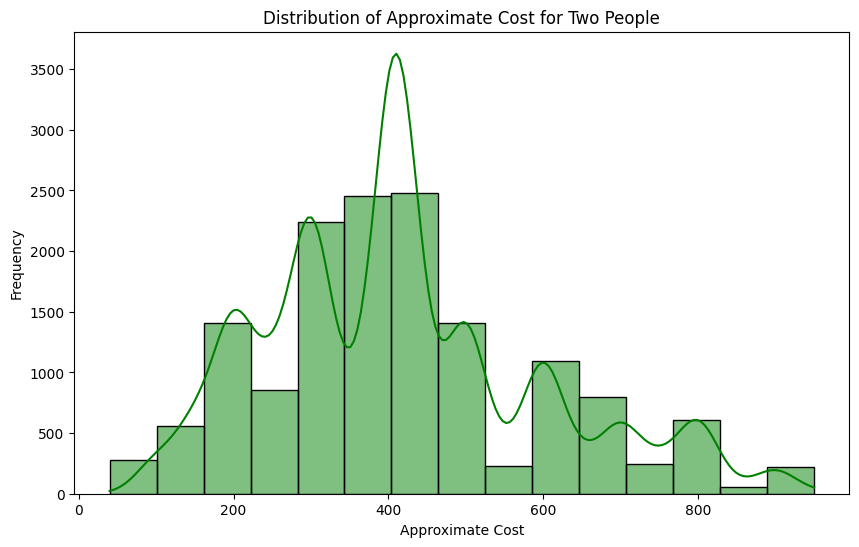

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=15, kde=True, color='green')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()

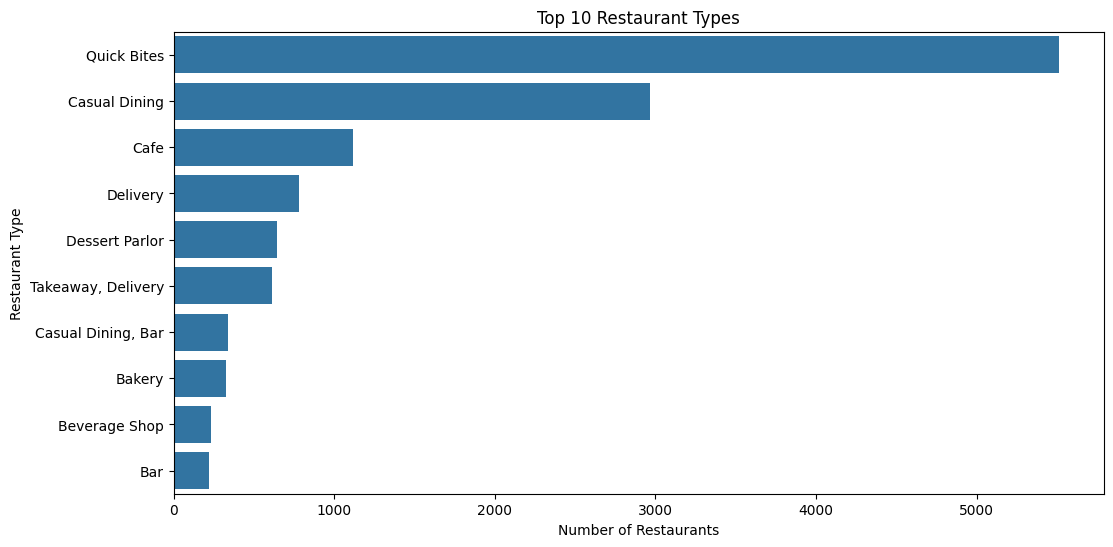

In [114]:
plt.figure(figsize=(12, 6))
rest_type_counts = df['rest_type'].value_counts()[:10]
sns.barplot(x=rest_type_counts.values, y=rest_type_counts.index)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

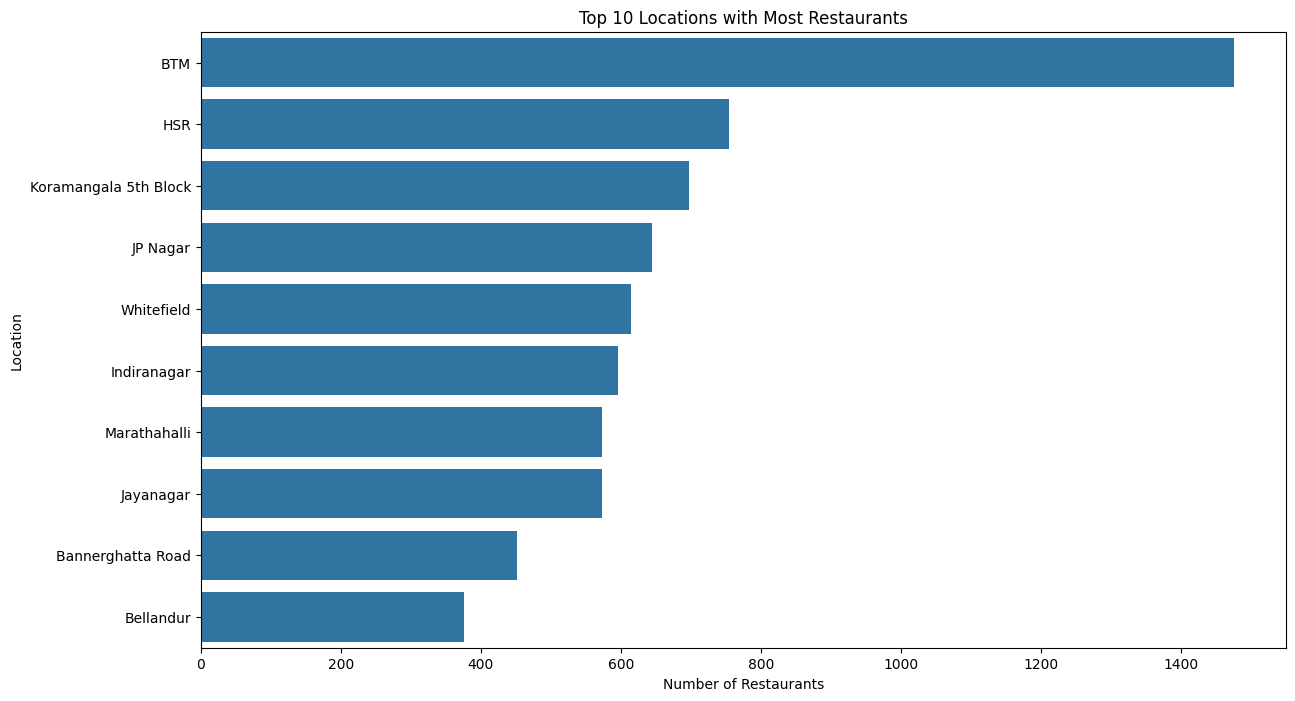

In [115]:
plt.figure(figsize=(14, 8))
location_counts = df['location'].value_counts()[:10]
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

# B

Build a content-based recommender system. Wrap it as a function that takes a string input and returns 5 recommended items.

In [116]:
# scaler = StandardScaler()
# df[numerical] = scaler.fit_transform(df[numerical])

In [117]:
food = ['sell_beverages', 'sell_chinese_food', 'sell_thai_food', 'sell_indian_food', 'sell_mediterranean_food', 'sell_fast_food', 'sell_desserts']

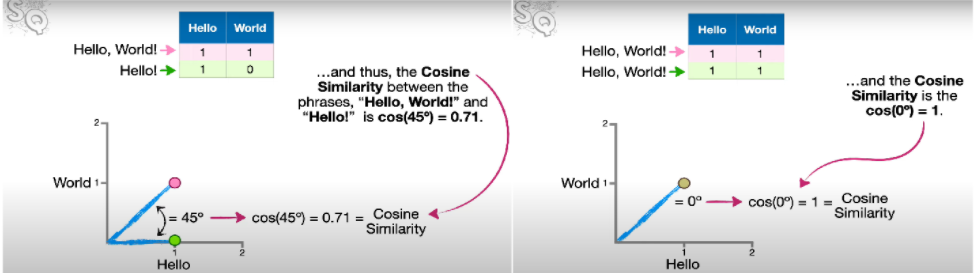

In [118]:
from IPython.display import Image
Image(filename="Cosine.png")

In [119]:
labelenc = LabelEncoder()
for i in food:
    df[i] = labelenc.fit_transform(df[i])

In [120]:
def recommend_restaurants_cuisines(input, df, top_n=5):
    count_vectorizer = CountVectorizer(stop_words='english')
    matrix = count_vectorizer.fit_transform(df['cuisines'])

    input_vector = count_vectorizer.transform([input])
    cosine_sim = cosine_similarity(input_vector, matrix).flatten()

    similar_restaurants = list(enumerate(cosine_sim))
    similar_restaurants = sorted(similar_restaurants, key=lambda x: x[1], reverse=True)

    recommendations = []
    for idx, score in similar_restaurants[1:top_n+1]:
        restaurant = df.iloc[idx]
        recommendations.append((restaurant['name'], score, restaurant['location'], restaurant['rate'], restaurant['approx_cost(for two people)']))

    return recommendations

In [121]:
def recommend_restaurants_locations(input, df, top_n=5):
    count_vectorizer = CountVectorizer(stop_words='english')
    matrix = count_vectorizer.fit_transform(df['location'])

    input_vector = count_vectorizer.transform([input])
    cosine_sim = cosine_similarity(input_vector, matrix).flatten()

    similar_loc = list(enumerate(cosine_sim))
    similar_loc = sorted(similar_loc, key=lambda x: x[1], reverse=True)

    recommendations = []
    for idx, score in similar_loc[1:top_n+1]:
        locs = df.iloc[idx]
        recommendations.append((locs['name'], score, locs['cuisines'], locs['rate'], locs['approx_cost(for two people)']))

    return recommendations

In [122]:
def recommend_restaurants_type(input, df, top_n=5):
    count_vectorizer = CountVectorizer(stop_words='english')
    matrix = count_vectorizer.fit_transform(df['rest_type'])

    input_vector = count_vectorizer.transform([input])
    cosine_sim = cosine_similarity(input_vector, matrix).flatten()

    similar_type = list(enumerate(cosine_sim))
    similar_type = sorted(similar_type, key=lambda x: x[1], reverse=True)

    recommendations = []
    for idx, score in similar_type[1:top_n+1]:
        types = df.iloc[idx]
        recommendations.append((types['name'], score, types['location'], types['rate'], types['approx_cost(for two people)']))

    return recommendations

Function with food type (its origin)

In [123]:
def recommend_restaurants(input_cuisine, input_food_features, df, food, top_n=5):
    count_vectorizer = CountVectorizer(stop_words='english')
    cuisine_matrix = count_vectorizer.fit_transform(df['cuisines'])

    input_cuisine_vector = count_vectorizer.transform([input_cuisine])
    cosine_sim = cosine_similarity(input_cuisine_vector, cuisine_matrix).flatten()

    food_data = df[food].values

    input_food_features = np.array(input_food_features).reshape(1, -1)
    food_similarity = cosine_similarity(input_food_features, food_data).flatten()

    combined_similarity = 0.5 * cosine_sim + 0.5 * food_similarity

    similar_restaurants = list(enumerate(combined_similarity))
    similar_restaurants = sorted(similar_restaurants, key=lambda x: x[1], reverse=True)

    recommendations = []
    for idx, score in similar_restaurants[1:top_n+1]:
        restaurant = df.iloc[idx]
        recommendations.append((restaurant['name'], score, restaurant['location'], restaurant['rate'], restaurant['approx_cost(for two people)']))

    return recommendations

# C

Evaluate the function usiNG 3 inputs.

- Also can change to 'input = input("Enter a what you looking for: ")'

Input 1 based on Cuisines

In [124]:
input_cuisine = "Indian, North Indian"
top_recommendations = recommend_restaurants_cuisines(input_cuisine, df)
for idx, rec in enumerate(top_recommendations, 1):
    print(f"{idx}. Name: {rec[0]} | Similarity: {rec[1]:.4f} | Location: {rec[2]} | Rating: {rec[3]} | Approx Cost: {rec[4]:.2f}")

1. Name: Simhapuri Mess | Similarity: 0.9487 | Location: Old Airport Road | Rating: 3.8 | Approx Cost: 300.00
2. Name: Bathinda Dine | Similarity: 0.9487 | Location: Indiranagar | Rating: 4.1 | Approx Cost: 950.00
3. Name: Allana Kabab | Similarity: 0.9487 | Location: Richmond Road | Rating: 3.3 | Approx Cost: 200.00
4. Name: Bonfooder | Similarity: 0.9487 | Location: Sarjapur Road | Rating: 3.9 | Approx Cost: 400.00
5. Name: Northern Gate- Gateway Hotel | Similarity: 0.9487 | Location: Residency Road | Rating: 4.0 | Approx Cost: 417.06



* User Input: "Indian, North Indian"
* Top Recommendations:
    * Simhapuri Mess (Similarity: 0.9487, Rating: 3.8, Approx Cost: ₹300)
    * Bathinda Dine (Similarity: 0.9487, Rating: 4.1, Approx Cost: ₹950)
    * Allana Kabab (Similarity: 0.9487, Rating: 3.3, Approx Cost: ₹200)
    * Bonfooder (Similarity: 0.9487, Rating: 3.9, Approx Cost: ₹400)
    * Northern Gate (Similarity: 0.9487, Rating: 4.0, Approx Cost: ₹417.06)

* Observation
    
    The recommendations are highly relevant to the input, focusing on Indian and North Indian cuisines. The system provides diverse options, from budget-friendly choices like "Allana Kabab" to premium options like "Bathinda Dine." Similarity scores are consistent, indicating a strong match between input cuisines and restaurant offerings.


Input 2 based on Location

In [125]:
input_loc = "JP Nagar"
top_recommendations = recommend_restaurants_locations(input_loc, df)
for idx, rec in enumerate(top_recommendations, 1):
    print(f"{idx}. Name: {rec[0]} | Similarity: {rec[1]:.4f} | Cuisine(s): {rec[2]} | Rating: {rec[3]} | Approx Cost: {rec[4]:.2f}")

1. Name: Onesta | Similarity: 1.0000 | Cuisine(s): Pizza, Cafe, Italian | Rating: 4.4 | Approx Cost: 600.00
2. Name: Mahek Pizza | Similarity: 1.0000 | Cuisine(s): Pizza | Rating: 3.9 | Approx Cost: 400.00
3. Name: Levitate Brewery and Kitchen | Similarity: 1.0000 | Cuisine(s): Finger Food, North Indian, Continental | Rating: 3.6987659433493456 | Approx Cost: 417.06
4. Name: The Little Kitchen | Similarity: 1.0000 | Cuisine(s): Chinese, North Indian | Rating: 3.4 | Approx Cost: 300.00
5. Name: Goli Vada Pav No. 1 | Similarity: 1.0000 | Cuisine(s): Street Food | Rating: 3.2 | Approx Cost: 200.00


- User Input: "JP Nagar"
- Top Recommendations:
  1. Onesta (Similarity: 1.0000, Rating: 4.4, Approx Cost: ₹600)
  2. Mahek Pizza (Similarity: 1.0000, Rating: 3.9, Approx Cost: ₹400)
  3. Levitate Brewery and Kitchen (Similarity: 1.0000, Rating: 3.7, Approx Cost: ₹417.06)
  4. The Little Kitchen (Similarity: 1.0000, Rating: 3.4, Approx Cost: ₹300)
  5. Goli Vada Pav No. 1 (Similarity: 1.0000, Rating: 3.2, Approx Cost: ₹200)

Observation:  
Recommendations focus exclusively on restaurants in JP Nagar, as intended. The results cover a range of cuisines, such as Italian, street food, and North Indian, reflecting variety within the location. The high similarity scores show precise matching to the specified locality.




Input 3 based on Restaurant Type

In [126]:
input_type = "Bakery"
top_recommendations = recommend_restaurants_cuisines(input_type, df)
for idx, rec in enumerate(top_recommendations, 1):
    print(f"{idx}. Name: {rec[0]} | Similarity: {rec[1]:.4f} | Location: {rec[2]} | Rating: {rec[3]} | Approx Cost: {rec[4]:.2f}")

1. Name: MRA | Similarity: 1.0000 | Location: Whitefield | Rating: 3.8 | Approx Cost: 200.00
2. Name: All Saints Bakery | Similarity: 1.0000 | Location: Brigade Road | Rating: 3.6 | Approx Cost: 200.00
3. Name: Chef Baker's | Similarity: 1.0000 | Location: Koramangala 1st Block | Rating: 3.6 | Approx Cost: 450.00
4. Name: Vanilla Pod | Similarity: 1.0000 | Location: Koramangala 4th Block | Rating: 3.6987659433493456 | Approx Cost: 300.00
5. Name: Melting Cakes | Similarity: 1.0000 | Location: Sarjapur Road | Rating: 3.6987659433493456 | Approx Cost: 600.00


- User Input: "Bakery"
- Top Recommendations:
  1. MRA (Similarity: 1.0000, Rating: 3.8, Approx Cost: ₹200)
  2. All Saints Bakery (Similarity: 1.0000, Rating: 3.6, Approx Cost: ₹200)
  3. Chef Baker's (Similarity: 1.0000, Rating: 3.6, Approx Cost: ₹450)
  4. Vanilla Pod (Similarity: 1.0000, Rating: 3.7, Approx Cost: ₹300)
  5. Melting Cakes (Similarity: 1.0000, Rating: 3.7, Approx Cost: ₹600)

Observation:  
The system successfully recommends bakery-specific restaurants across different locations. The results are consistent with user intent and offer diverse options in terms of ratings and price points. All recommendations have a perfect similarity score, showing strong alignment with the input type.

``` ['sell_beverages', 'sell_chinese_food', 'sell_thai_food', 'sell_indian_food', 'sell_mediterranean_food', 'sell_fast_food', 'sell_desserts'] ```



In [127]:
input_cuisine = "Indian, North Indian"
input_food_features = [1, 1, 0, 1, 0, 0, 1]
top_recommendations = recommend_restaurants(input_cuisine, input_food_features, df, food, top_n=5)
for idx, rec in enumerate(top_recommendations, 1):
    print(f"{idx}. Name: {rec[0]}, Similarity: {rec[1]:.4f}, Location: {rec[2]}, Rating: {rec[3]}, Approx Cost: {rec[4]}")

1. Name: Kamat Restaurant, Similarity: 0.8727, Location: City Market, Rating: 3.6, Approx Cost: 400.0
2. Name: Kamat Restaurant, Similarity: 0.8727, Location: City Market, Rating: 3.6, Approx Cost: 400.0
3. Name: Kamat Restaurant, Similarity: 0.8727, Location: City Market, Rating: 3.6, Approx Cost: 400.0
4. Name: Kamat Restaurant, Similarity: 0.8727, Location: City Market, Rating: 3.6, Approx Cost: 400.0
5. Name: Shree Muthahalli Veg, Similarity: 0.8536, Location: HSR, Rating: 4.2, Approx Cost: 300.0



- User Input: Cuisines: "Indian, North Indian"  
  Food Features: [1 (Beverages), 1 (Chinese), 0 (Thai), 1 (Indian), 0 (Mediterranean), 0 (Fast Food), 1 (Desserts)]
- Top Recommendations:
  1. Kamat Restaurant (Similarity: 0.8727, Rating: 3.6, Approx Cost: ₹400)
  2. Kamat Restaurant (Similarity: 0.8727, Rating: 3.6, Approx Cost: ₹400)
  3. Shree Muthahalli Veg (Similarity: 0.8536, Rating: 4.2, Approx Cost: ₹300)

---

### Conclusion
The recommendation system provides accurate and relevant suggestions for different user preferences. It effectively combines cosine similarity with restaurant features to match inputs like cuisines, location, and type.

However, in my opinion, further improvements, such as incorporating diversity constraints or alternative similarity metrics, could enhance its performance and user satisfaction. This system is a robust starting point for developing personalized recommendations in the food and hospitality industry.

---


In [128]:
df[df['name'] == 'Kamat Restaurant']

,url,name,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
1380,https://www.zomato.com/bangalore/kamat-restaur...,Kamat Restaurant,3.6,City Market,Casual Dining,"South Indian, North Indian, Chinese, Desserts,...",400.0,Dine-out,1,1,0,1,0,0,1
3986,https://www.zomato.com/bangalore/kamat-restaur...,Kamat Restaurant,3.6,City Market,Casual Dining,"South Indian, North Indian, Chinese, Desserts,...",400.0,Delivery,1,1,0,1,0,0,1
9985,https://www.zomato.com/bangalore/kamat-restaur...,Kamat Restaurant,3.6,City Market,Casual Dining,"South Indian, North Indian, Chinese, Desserts,...",400.0,Dine-out,1,1,0,1,0,0,1
11162,https://www.zomato.com/bangalore/kamat-restaur...,Kamat Restaurant,3.6,City Market,Casual Dining,"South Indian, North Indian, Chinese, Desserts,...",400.0,Delivery,1,1,0,1,0,0,1
12575,https://www.zomato.com/bangalore/kamat-restaur...,Kamat Restaurant,3.6,City Market,Casual Dining,"South Indian, North Indian, Chinese, Desserts,...",400.0,Dine-out,1,1,0,1,0,0,1


In [129]:
df[df['name'] == 'Shree Muthahalli Veg']

,url,name,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
1326,https://www.zomato.com/bangalore/shree-muthaha...,Shree Muthahalli Veg,4.2,HSR,Quick Bites,"South Indian, North Indian, Chinese, Juices, I...",300.0,Delivery,1,1,0,1,0,0,1
5400,https://www.zomato.com/bangalore/shree-muthaha...,Shree Muthahalli Veg,4.1,HSR,Quick Bites,"South Indian, North Indian, Chinese, Juices, I...",300.0,Delivery,1,1,0,1,0,0,1
7570,https://www.zomato.com/bangalore/shree-muthaha...,Shree Muthahalli Veg,4.1,HSR,Quick Bites,"South Indian, North Indian, Chinese, Juices, I...",300.0,Dine-out,1,1,0,1,0,0,1
